In [ ]:
!pip install gdown

import gdown

# Use your specific file ID
file_id = '1wAP-AU5Ogft8jElLOb212yq0-UH8tw5v'
gdown.download(f"https://drive.google.com/uc?export=download&id={file_id}", 'data_with_topics.csv', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?export=download&id=1wAP-AU5Ogft8jElLOb212yq0-UH8tw5v
From (redirected): https://drive.google.com/uc?export=download&id=1wAP-AU5Ogft8jElLOb212yq0-UH8tw5v&confirm=t&uuid=7543e47a-6622-40e8-b4f0-bcee452afa85
To: /content/data_with_topics.csv
100%|██████████| 143M/143M [00:02<00:00, 53.9MB/s]


'data_with_topics.csv'

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('data_with_topics.csv')

In [ ]:
df['البحر'].value_counts()

,count
البحر,
الطويل,9389
الكامل,7971
البسيط,6821
الوافر,5588
الخفيف,4612
السريع,3224
المتقارب,3075
الرمل,2821
الرجز,2168


In [ ]:
df.head(2)

,Unnamed: 0,القافية,البحر,poem_body,topics
0,0,ب,الخفيف,أنكرت لمة رأتها خضيباً | ثم قالت رأيت زوراً غر...,"[(0.533, 1), (0.289, 0)]"
1,1,م,الكامل,قف بالديار فنادها بسلام | حييت من دمن ورسم خيا...,"[(0.612, 2)]"


In [ ]:
# import pandas as pd

# # Replace 'your_file.csv' with the actual path to your CSV file in Google Drive
# df = pd.read_csv('/content/drive/My Drive/data_with_topics.csv')

# # Display the first few rows to ensure it's loaded correctly
# df.head()

In [ ]:
# Assuming your DataFrame is named 'df' and the column with the poems is 'poem_body'

df['word_count'] = df['poem_body'].apply(lambda x: len(str(x).split()))


In [ ]:
df.head()

,Unnamed: 0,القافية,البحر,poem_body,topics,word_count
0,0,ب,الخفيف,أنكرت لمة رأتها خضيباً | ثم قالت رأيت زوراً غر...,"[(0.533, 1), (0.289, 0)]",44
1,1,م,الكامل,قف بالديار فنادها بسلام | حييت من دمن ورسم خيا...,"[(0.612, 2)]",198
2,2,ل,المنسرح,قالت سَلا وُدَّنا وحالَ ولمْ | أسلُ فيُجري به ...,"[(0.589, 0)]",21
3,3,م,الكامل,قد قلت عن علم فعوا ما قلت إذ | ليس المقلد في ا...,"[(0.475, 3), (0.238, 2), (0.162, 0)]",27
4,4,ن,الطويل,أبا السمطِ إنْ كانت أحاديثكَ التي | أتتنا يقين...,"[(0.416, 1), (0.22, 3), (0.201, 2)]",26


In [ ]:
df.describe()

,Unnamed: 0,word_count
count,49826.000000,49826.000000
mean,28483.743367,285.318268
std,16464.940378,596.363025
min,0.000000,6.000000
25%,14282.250000,35.000000
50%,28420.500000,93.000000
75%,42831.750000,295.000000
max,56947.000000,18582.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


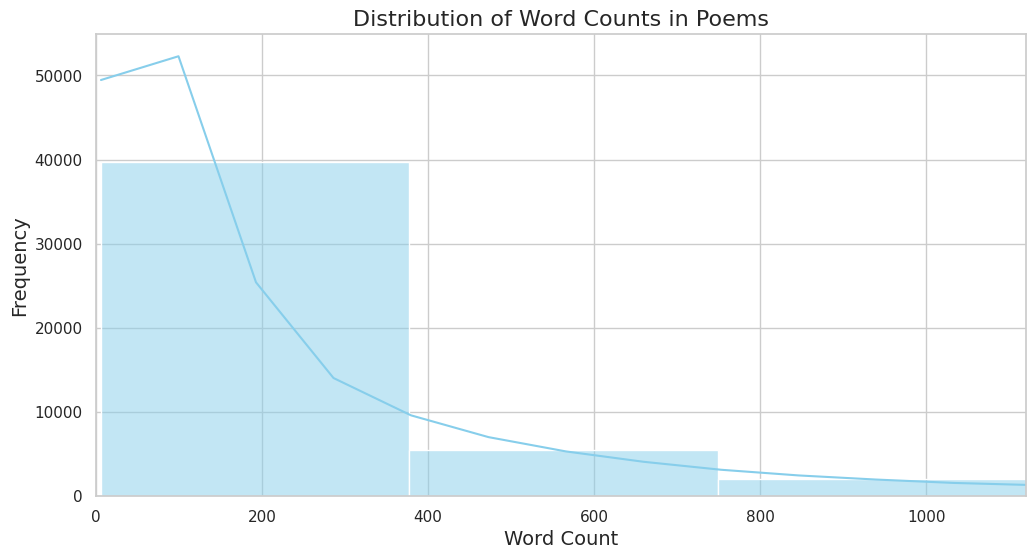

In [ ]:
# Set the style of the plots
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['word_count'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Word Counts in Poems', fontsize=16)
plt.xlabel('Word Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xlim(0, df['word_count'].quantile(0.95))  # Limit x-axis to 95th percentile to avoid skew from outliers
plt.show()


In [ ]:
import ast
df['topics'] = df['topics'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [ ]:
# Function to count unique topics in each row
def count_unique_topics(topic_list):
    if isinstance(topic_list, list):  # Ensure the value is a list
        # Extract the second element from each tuple (the topic label)
        topic_labels = [t[1] for t in topic_list if isinstance(t, tuple) and len(t) == 2]
        # Return the count of unique topics
        return len(set(topic_labels))  # Use set to remove duplicates and count unique topics
    else:
        return 0  # If not a list, return 0

# Apply the function to the 'topics' column and store the result in a new column 'topic_count'
df['topic_count'] = df['topics'].apply(count_unique_topics)

# Now we can count how many rows have 1, 2, 3, or 4 topics
topic_distribution = df['topic_count'].value_counts().sort_index()

df = df[df['topic_count'] > 0]

# Display the result
topic_distribution



,count
topic_count,
0,107
1,26297
2,7432
3,15990


In [ ]:
# Function to count the number of "بیوت" (verses) separated by "||"
def count_biets(poem):
    if isinstance(poem, str):  # Ensure the value is a string
        return poem.count('||') + 1  # Count "||" and add 1 for the last biet
    else:
        return 0  # If not a string, return 0

# Apply the function to the 'poem' column and store the result in a new column 'biet_count'
df['biet_count'] = df['poem_body'].apply(count_biets)

# Find the poem with the most "بیوت"
max_biets_poem = df[df['biet_count'] == df['biet_count'].max()]


In [ ]:
a=max_biets_poem['poem_body'].values[0]


In [ ]:
def extract_first_verses(poem, num_verses=66):
    # Split the poem by '||' which separates each بيت
    verses = poem.split('||')

    # Get the first num_verses of the poem
    first_verses = verses[:num_verses]

    # Return the first num_verses joined back together
    return ' || '.join(first_verses)



# Extract the first 66 verses
first_66_verses = extract_first_verses(a, num_verses=66)

print(first_66_verses)

هو اللّه بسم اللّه تسبيح فطرتي | هو اللّه إخلاصي وفي اللّه نزعتي  ||  هو اللّه بسم اللّه ذاتي تجردت | وهامت بمجلى النور عين حقيقتي  ||  هو اللّه بسم اللّه ضاءت فأشرقت | بأنوار نور اللّه نفس هويتي  ||  هو اللّه بسم اللّه في كل لحظة | بأسرار سر الجمع جمع تشتتي  ||  هو اللّه بسم اللّه ذرات عالمي | خواتمهما بدء كعالم ذرتي  ||  هو اللّه بسم اللّه هبت فشاهدت | بروق جلال من أنا اللّه غيبتي  ||  هو اللّه بسم الله شاهدت اسمه | فتاهت بافناء الفناء أنيتي  ||  هو اللّه بسم اللّه فقري محقق | غذائي وذلي باسمه عين عزتي  ||  هو اللّه بسم اللّه نور جلاله | به احترقت آفات نفسي ونشأتي  ||  هو اللّه بسم اللّه أسرار اسمه | بها صعقت عني شياطين شهوتي  ||  هو اللّه بسم اللّه تزكو خواطري | وتصدق إلا عن مراضيه لفتتي  ||  هو اللّه بسم اللّه جردت وحدتي | لوحدته إذ منه لي فيه وحدتي  ||  هو اللّه بسم اللّه أنسي شهوده | ولو غيبته العين مت بوحشتي  ||  هو اللّه بسم اللّه أوقفت رؤيتي | عليه وديني مخلصاً نفسي رؤيتي  ||  هو اللّه بسم اللّه حجي وعمرتي | إلى بيته المعمور إذ هو بضعتي  ||  هو اللّه بسم اللّه نفسي مشاعري | ون

In [ ]:
def extract_after_verses(poem, num_verses=66):
    # Split the poem by '||' which separates each بيت
    verses = poem.split('||')

    # Get the verses after the first num_verses
    remaining_verses = verses[num_verses:]

    # Return the remaining verses joined back together
    return ' || '.join(remaining_verses)

# Example usage
poem = """هو الله || بسم الله تسبيح فطرتي || هو الرحمن || رب العالمين يا نور اليقين || سبحان من خلق السموات والأرض || وكل شيء بنظام في ملكوت الله ||...""" # Add your full poem here

# Extract the verses after the first 66
verses_after_66 = extract_after_verses(a, num_verses=66)




In [ ]:
verses_after_66

' ببابك يا اللّه عبدك مخبت | تعلقه باللّه من كل وجهة  ||  تعلقت باللّه الذي لا إله لي | سواه ولا ضاعت لديه عبودتي  ||  تعلقت باللّه العليم بموقفي | وما أنا فيه من ضروب البلية  ||  تعلقت باللّه العظيم الذي جرت | مقاديره دون اختيار البرية  ||  تعلقت باللّه اللطيف بخلقه | وهذا هدى منه لنفعي وخيرتي  ||  تعلقت باللّه الكريم ولم تخب | أمان على باب الكريم استقرت  ||  تعلقت باللّه المبر عباده | بلا سبب منهم لدرك المبرة  ||  تعلقت باللّه الحليم وإنني | لأعظم شيء في الخطايا خطيئتي  ||  تعلقت باللّه المتين وإنه | لأمتن حبل بالمتين وثيقتي  ||  تعلقت باللّه المجيد وما انثنى | مؤمل مجد اللّه صدقاً بخيبة  ||  تعلقت باللّه الحميد بحمده | وسيلة قصدي حمده حسب قدرتي  ||  تعلقت باللّه الجليل تعلقاً | نسخت به مني ظلال الخليقة  ||  تعلقت باللّه الولي تعلقاً | أراني ولاء الحق من قبل نشأتي  ||  تعلقت باللّه العلي تعلقاً | علوت به عن مركزي وطبيعتي  ||  تعلقت باللّه الوكيل وقد عدت | على العوادي المهلكات وشدت  ||  تعلقت باللّه الكفيل وفضله | عظيم وقد ضاقت علي معيشتي  ||  تعلقت باللّه الحفي بأهله | واهليتي للّه ف

In [ ]:
def count_poems_in_ranges(poems):
    # Define the ranges of interest
    ranges = [(i, i+100) for i in range(1, 1000, 100)]

    # Dictionary to store counts for each range
    range_counts = {f"{start}-{end}": 0 for start, end in ranges}

    # Count poems based on the number of biets (verses)
    for poem in poems:
        biet_count = poem.count('||') + 1  # Count number of verses
        for start, end in ranges:
            if start <= biet_count < end:
                range_counts[f"{start}-{end}"] += 1
                break

    return range_counts



In [ ]:
range_counts = count_poems_in_ranges(df["poem_body"])

# Print the results
for range_label, count in range_counts.items():
    print(f"Number of poems with بيوت in range {range_label}: {count}")

Number of poems with بيوت in range 1-101: 47351
Number of poems with بيوت in range 101-201: 1709
Number of poems with بيوت in range 201-301: 378
Number of poems with بيوت in range 301-401: 145
Number of poems with بيوت in range 401-501: 64
Number of poems with بيوت in range 501-601: 29
Number of poems with بيوت in range 601-701: 19
Number of poems with بيوت in range 701-801: 4
Number of poems with بيوت in range 801-901: 6
Number of poems with بيوت in range 901-1001: 5


In [ ]:
df.head(4)

,Unnamed: 0,القافية,البحر,poem_body,topics,word_count,topic_count,biet_count
0,0,ب,الخفيف,أنكرت لمة رأتها خضيباً | ثم قالت رأيت زوراً غر...,"[(0.533, 1), (0.289, 0)]",44,2,4
1,1,م,الكامل,قف بالديار فنادها بسلام | حييت من دمن ورسم خيا...,"[(0.612, 2)]",198,1,18
2,2,ل,المنسرح,قالت سَلا وُدَّنا وحالَ ولمْ | أسلُ فيُجري به ...,"[(0.589, 0)]",21,1,2
3,3,م,الكامل,قد قلت عن علم فعوا ما قلت إذ | ليس المقلد في ا...,"[(0.475, 3), (0.238, 2), (0.162, 0)]",27,3,2


In [ ]:
filtered_poems = df[~((df['biet_count'] >= 301) & (df['biet_count'] <= 1001))]

# Display how many poems remain after filtering
remaining_poems = len(filtered_poems)
print(f"Remaining poems after removing those with 301-1001 بيوت: {remaining_poems}")



Remaining poems after removing those with 301-1001 بيوت: 49447


In [ ]:
poems_201_301 = df[(df['biet_count'] >= 201) & (df['biet_count'] <= 301)]



In [ ]:
poems_201_301.head(1)

,Unnamed: 0,القافية,البحر,poem_body,topics,word_count,topic_count,biet_count
810,894,ر,الطويل,لِذِكرَى ليالي الوصل يُستعذَبُ الذِّكْرُ | ويَ...,"[(0.367, 1), (0.251, 3), (0.242, 0)]",2908,3,238


In [ ]:
sample = poems_201_301 = df[(df['biet_count'] >= 90) & (df['biet_count'] <= 100)]

In [ ]:
sample.head(1)

,Unnamed: 0,القافية,البحر,poem_body,topics,word_count,topic_count,biet_count
1002,1110,ا,الكامل,المَرءُ آفَتُهُ هَوى الدُنيا | وَالمَرءُ يَطغى...,"[(0.463, 1), (0.321, 2), (0.183, 3)]",1120,3,94


In [ ]:
# Function to count unique topics in each row
def count_unique_topics(topic_list):
    if isinstance(topic_list, list):  # Ensure the value is a list
        # Extract the second element from each tuple (the topic label)
        topic_labels = [t[1] for t in topic_list if isinstance(t, tuple) and len(t) == 2]
        # Return the count of unique topics
        return len(set(topic_labels))  # Use set to remove duplicates and count unique topics
    else:
        return 0  # If not a list, return 0

# Apply the function to the 'topics' column and store the result in a new column 'topic_count'
filtered_poems['topic_count'] = filtered_poems['topics'].apply(count_unique_topics)

# Now we can count how many rows have 1, 2, 3, or 4 topics
topic_distribution = filtered_poems['topic_count'].value_counts().sort_index()

filtered_poems = filtered_poems[filtered_poems['topic_count'] > 0]

# Display the result
topic_distribution

<ipython-input-27-3140038891d3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_poems['topic_count'] = filtered_poems['topics'].apply(count_unique_topics)


,count
topic_count,
1,26153
2,7374
3,15920


In [ ]:
def select_highest_topic(topics_list):
    # Sort the topics by percentage in descending order and return the topic with the highest percentage
    if topics_list:
        highest_topic = sorted(topics_list, key=lambda x: x[0], reverse=True)[0]
        return highest_topic[1]  # Return the topic ID (second element in tuple)
    return None

# Step 3: Apply the function to the 'topics' column in the copied DataFrame
filtered_poems['selected_topic'] = filtered_poems['topics'].apply(select_highest_topic)

In [ ]:
filtered_poems.head(4)

,Unnamed: 0,القافية,البحر,poem_body,topics,word_count,topic_count,biet_count,selected_topic
0,0,ب,الخفيف,أنكرت لمة رأتها خضيباً | ثم قالت رأيت زوراً غر...,"[(0.533, 1), (0.289, 0)]",44,2,4,1
1,1,م,الكامل,قف بالديار فنادها بسلام | حييت من دمن ورسم خيا...,"[(0.612, 2)]",198,1,18,2
2,2,ل,المنسرح,قالت سَلا وُدَّنا وحالَ ولمْ | أسلُ فيُجري به ...,"[(0.589, 0)]",21,1,2,0
3,3,م,الكامل,قد قلت عن علم فعوا ما قلت إذ | ليس المقلد في ا...,"[(0.475, 3), (0.238, 2), (0.162, 0)]",27,3,2,3


In [ ]:

# Step 4: Filter the DataFrame to keep only poems where biet_count is between 5 and 100
df_filtered_biet_range = filtered_poems[filtered_poems['biet_count'] >= 5]



In [ ]:
topic_mapping = {
    0: "الحب، الجمال، والعاطفة",
    1: "التجربة الإنسانية، القدر، والموت",
    2: "الملكية، القوة، والزمن",
    3: "الفضيلة، الإيمان، والمعرفة"
}

# Create a new column for the mapped topic names
df_filtered_biet_range['mapped_topic'] = df_filtered_biet_range['selected_topic'].map(topic_mapping)


<ipython-input-31-8c8569208928>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_biet_range['mapped_topic'] = df_filtered_biet_range['selected_topic'].map(topic_mapping)


In [ ]:
df_filtered_biet_range.head(5)

,Unnamed: 0,القافية,البحر,poem_body,topics,word_count,topic_count,biet_count,selected_topic,mapped_topic
1,1,م,الكامل,قف بالديار فنادها بسلام | حييت من دمن ورسم خيا...,"[(0.612, 2)]",198,1,18,2,الملكية، القوة، والزمن
5,5,م,الرجز,بارَكَ فيك اللّهُ من غلامٍ | يا اِبن الّذي في ...,"[(0.338, 1), (0.319, 2), (0.246, 3)]",65,3,6,1,التجربة الإنسانية، القدر، والموت
8,8,ء,الكامل,وأعزّةٌ عَزَّيتُ بعد فراقهم | باليأس قلبي أن ي...,"[(0.649, 0)]",62,1,6,0,الحب، الجمال، والعاطفة
9,9,ب,الطويل,وقومٍ أخَلُّوا بالذمام لمن رَعى | لَهُم ونسوا ...,"[(0.463, 1), (0.34, 0)]",202,2,15,1,التجربة الإنسانية، القدر، والموت
10,10,ب,الكامل,هل في مَودَّةِ ناكثٍ من راغبِ | أم هل على فقدا...,"[(0.795, 2)]",603,1,53,2,الملكية، القوة، والزمن


In [ ]:
max_biet_count = df_filtered_biet_range['biet_count'].max()

print("Maximum poem length in terms of number of بيت:", max_biet_count)

Maximum poem length in terms of number of بيت: 1547


In [ ]:
def crop_to_max_biet(df, max_biet=15):
    # Function to crop the poem_body based on '||'
    cropped_rows = []
    for _, row in df.iterrows():
        # Splitting the poem_body based on '||' delimiter
        biets = row['poem_body'].split('||')

        # Cropping biets if exceeding max_biet
        if len(biets) > max_biet:
            biets = biets[:max_biet]

        # Rejoining the cropped biets to maintain format
        cropped_poem_body = '||'.join(biets)

        # Creating a new row with the cropped poem_body
        new_row = row.copy()
        new_row['poem_body'] = cropped_poem_body
        new_row['biet_count'] = len(biets)  # Updating the biet_count after cropping
        cropped_rows.append(new_row)

    # Creating a new DataFrame with the cropped rows
    df_cropped = pd.DataFrame(cropped_rows)
    return df_cropped

# Applying the function to crop to 30 biets
df_cropped = crop_to_max_biet(df_filtered_biet_range)

# Checking the maximum biet count after cropping
max_biet_count = df_cropped['biet_count'].max()
print(f"Maximum biet count after cropping: {max_biet_count}")



Maximum biet count after cropping: 15


In [ ]:
selected_meters = ['الطويل', 'الكامل', 'البسيط', 'الوافر', 'الخفيف']

# Filtering the DataFrame to include only the selected meters
df_filtered = df_cropped[df_cropped['البحر'].isin(selected_meters)]

# Ensuring each selected meter has exactly 2000 samples
df_balanced = df_filtered.groupby('البحر').apply(lambda x: x.sample(n=1200, random_state=42)).reset_index(drop=True)


<ipython-input-136-a4b6444b1c76>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df_filtered.groupby('البحر').apply(lambda x: x.sample(n=1200, random_state=42)).reset_index(drop=True)


In [ ]:
df_balanced.shape

(7500, 10)

In [ ]:
columns_to_drop = ['topics', 'word_count', 'topic_count', 'biet_count', 'selected_topic']
df_final = df_balanced.drop(columns=columns_to_drop)



In [ ]:
df_final['البحر'].value_counts()

,count
البحر,
البسيط,1600
الخفيف,1600
الطويل,1600
الكامل,1600
الوافر,1600


In [ ]:
unique_topics

NameError: name 'unique_topics' is not defined

In [ ]:
import json

# Generate JSON data with 'input' and 'output' as strings
json_data = [
    {
        "input": f"موضوع: {row['mapped_topic']}, بحر: {row['البحر']}, قافية: {row['القافية']}",
        "output": row["poem_body"]
    }
    for _, row in df_final.iterrows()
]

# Convert to JSON string with indentation for readability
json_output = json.dumps(json_data, ensure_ascii=False, indent=2)


In [ ]:
import os
with open("poems.json", "w", encoding="utf-8") as f:
    json.dump(json_data, f, ensure_ascii=False, indent=2)

In [ ]:
import os
with open("poems.json", "w", encoding="utf-8") as f:
    json.dump(json_data, f, ensure_ascii=False, indent=2)

# Get the file size in MB
file_size_mb = os.path.getsize("poems.json") / (1024 * 1024)  # Convert to MB

print(f"The size of the JSON file is approximately {file_size_mb:.2f} MB")


The size of the JSON file is approximately 8.87 MB


In [ ]:
from google.colab import files
files.download('poems.json')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>